In [83]:
import pandas as pd
from collections import defaultdict

# First, load a results file
RANKINGS_PATH = "../rankings.csv"
rankings = pd.read_csv(RANKINGS_PATH)

In [84]:
# Define the parameter sets for which to check
PARAMS = [(1, 20, 500, 500, 50, 5000)]

In [85]:
# Define the ranking for the uninformed method
# METHOD: Purely peak-performance based. If that is the same, choose lowest variation number first where sequential < omp < cuda
uninformed_ranking = [
#     ("home_desktop", "CUDA_GPU1", 1), # 10070.0
    
#     ("DAS5", "CUDA_GPU1", 1), # 6691.0
    
    ("home_desktop", "OMP_CPU5", 16), # 460.8 (simd, only fwd pass)
    ("home_desktop", "OMP_CPU5", 32), # 460.8 (simd, only fwd pass)
    ("home_desktop", "OMP_CPU8", 16), # 460.8 (simd)
    ("home_desktop", "OMP_CPU8", 32), # 460.8 (simd)
    
    ("DAS5", "OMP_CPU5", 32), # 307.2 (simd, only fwd pass)
    ("DAS5", "OMP_CPU8", 32), # 307.2 (simd)
    
    ("lisa", "OMP_CPU5", 16), # 256 (simd, only fwd pass)
    ("lisa", "OMP_CPU5", 32), # 256 (simd, only fwd pass)
    ("lisa", "OMP_CPU8", 16), # 256 (simd)
    ("lisa", "OMP_CPU8", 32), # 256 (simd)
    
    ("home_desktop", "OMP_CPU5", 8), # 230.4 (simd, only fwd pass)
    ("home_desktop", "OMP_CPU8", 8), # 230.4 (simd)
    
    ("DAS5", "OMP_CPU5", 16), # 153.6 (simd, only fwd pass)
    ("DAS5", "OMP_CPU8", 16), # 153.6 (simd)
    
    ("lisa", "OMP_CPU5", 8), # 128 (simd, only fwd pass)
    ("lisa", "OMP_CPU8", 8), # 128 (simd)
    
    ("home_desktop", "OMP_CPU1", 16), # 115.2 (only fwd pass)
    ("home_desktop", "OMP_CPU1", 32), # 115.2 (only fwd pass)
    ("home_desktop", "OMP_CPU3", 16), # 115.2
    ("home_desktop", "OMP_CPU3", 32), # 115.2
    ("home_desktop", "OMP_CPU5", 4), # 115.2 (simd, only fwd pass)
    ("home_desktop", "OMP_CPU7", 16), # 115.2
    ("home_desktop", "OMP_CPU7", 32), # 115.2
    ("home_desktop", "OMP_CPU8", 4), # 115.2 (simd)
    
    ("DAS5", "OMP_CPU1", 32), # 76.8 (only fwd pass)
    ("DAS5", "OMP_CPU3", 32), # 76.8
    ("DAS5", "OMP_CPU5", 8), # 76.8 (simd, only fwd pass)
    ("DAS5", "OMP_CPU7", 32), # 76.8
    ("DAS5", "OMP_CPU8", 8), # 76.8 (simd)
    
    ("lisa", "OMP_CPU1", 32), # 64 (only fwd pass)
    ("lisa", "OMP_CPU3", 32), # 64
    ("lisa", "OMP_CPU5", 4), # 64 (simd, only fwd pass)
    ("lisa", "OMP_CPU7", 32), # 64
    ("lisa", "OMP_CPU8", 4), # 64 (simd)
    
    ("home_desktop", "OMP_CPU1", 8), # 57.6 (only fwd pass)
    ("home_desktop", "OMP_CPU3", 8), # 57.6
    ("home_desktop", "OMP_CPU5", 2), # 57.6 (simd, only fwd pass)
    ("home_desktop", "OMP_CPU7", 8), # 57.6
    ("home_desktop", "OMP_CPU8", 2), # 57.6 (simd)
    
    ("DAS5", "OMP_CPU1", 16), # 38.4 (only fwd pass)
    ("DAS5", "OMP_CPU3", 16), # 38.4
    ("DAS5", "OMP_CPU5", 4), # 38.4 (simd, only fwd pass)
    ("DAS5", "OMP_CPU7", 16), # 38.4
    ("DAS5", "OMP_CPU8", 4), # 38.4 (simd)
    
    ("lisa", "OMP_CPU1", 16), # 32 (only fwd pass)
    ("lisa", "OMP_CPU3", 16), # 32
    ("lisa", "OMP_CPU5", 2), # 32 (simd, only fwd pass)
    ("lisa", "OMP_CPU7", 16), # 32
    ("lisa", "OMP_CPU8", 2), # 32 (simd)
    
    ("home_desktop", "OMP_CPU1", 4), # 28.8 (only fwd pass)
    ("home_desktop", "OMP_CPU3", 4), # 28.8
    ("home_desktop", "OMP_CPU4", 1), # 28.8
    ("home_desktop", "OMP_CPU7", 4), # 28.8
    
    ("DAS5", "OMP_CPU1", 8), # 19.2 (only fwd pass)
    ("DAS5", "OMP_CPU3", 8), # 19.2
    ("DAS5", "OMP_CPU5", 2), # 19.2 (simd, only fwd pass)
    ("DAS5", "OMP_CPU7", 8), # 19.2
    ("DAS5", "OMP_CPU8", 2), # 19.2 (simd)
    
    ("lisa", "OMP_CPU1", 8), # 16 (only fwd pass)
    ("lisa", "OMP_CPU3", 8), # 16
    ("lisa", "OMP_CPU4", 1), # 16
    ("lisa", "OMP_CPU7", 8), # 16
    
    ("home_desktop", "OMP_CPU1", 2), # 14.4 (only fwd pass)
    ("home_desktop", "OMP_CPU3", 2), # 14.4
    ("home_desktop", "OMP_CPU7", 2), # 14.4
    
    ("DAS5", "OMP_CPU1", 4), # 9.6 (only fwd pass)
    ("DAS5", "OMP_CPU3", 4), # 9.6
    ("DAS5", "OMP_CPU4", 1), # 9.6
    ("DAS5", "OMP_CPU7", 4), # 9.6
    
    ("lisa", "OMP_CPU1", 4), # 8 (only fwd pass)
    ("lisa", "OMP_CPU3", 4), # 8
    ("lisa", "OMP_CPU7", 4), # 8
    
    ("home_desktop", "sequential", 1), # 7.2
    
    ("DAS5", "OMP_CPU1", 2), # 4.8 (only fwd pass)
    ("DAS5", "OMP_CPU3", 2), # 4.8
    ("DAS5", "OMP_CPU7", 2), # 4.8
    
    ("lisa", "OMP_CPU1", 2), # 4 (only fwd pass)
    ("lisa", "OMP_CPU3", 2), # 4
    ("lisa", "OMP_CPU7", 2), # 4
    
    ("DAS5", "sequential", 1), # 2.4
    
    ("lisa", "sequential", 1)  # 2
]

In [86]:
from collections import defaultdict

# Fetch all the rankings with the same parameters. In the case of multiple, choose the first.
predicted_rankings = defaultdict(lambda: {})
benchmark_rankings = defaultdict(lambda: {})
for ranking_id in rankings["ranking_id"].unique():
    for i, row in rankings[rankings["ranking_id"] == ranking_id].iterrows():
        # Extract the parameters
        params = tuple(row.iloc[2:8])
        
        # If there are already with those, skip
        if row["ranking_position"] in predicted_rankings[params]:
            continue
        
        # Put the ranking in the dict
            
        # Store this ranking
        predicted_rankings[params][row["ranking_position"]] = tuple(row.iloc[8:11])
        benchmark_rankings[params][row["ranking_position"]] = tuple(row.iloc[12:16])

# Get rid of the default stuff
predicted_rankings = {params: predicted_rankings[params] for params in predicted_rankings}
benchmark_rankings = {params: benchmark_rankings[params] for params in benchmark_rankings}

In [87]:
NAMES = ["n_hidden_layers", "nodes_per_layer", "n_epochs", "n_samples", "sample_size", "n_classes"]
NAME_INDEX_MAP = {
    "n_hidden_layers": 0,
    "nodes_per_layer": 1,
    "n_epochs": 2,
    "n_samples": 3,
    "sample_size": 4,
    "n_classes": 5
}
NAME_DEFAULT_MAP = {
    "n_hidden_layers" : 1,
    "nodes_per_layer" : 20,
    "n_epochs" : 500,
    "n_samples" : 500,
    "sample_size" : 50,
    "n_classes" : 10
}


def get_by_var(data, varname):
    """
        This function is able to return all rankings for a certain variable, in increasing order for that variable
        Returns the values of all static parameters, list of (param, benchmark) pairs where each pair is first the value of the param and then the benchmark data
    """
    
    # Search for the one all default
    results = []
    for params in data:
        got_em = True
        for i, p in enumerate(params):
            if p != NAME_DEFAULT_MAP[NAMES[i]]:
                got_em = False
                break
        if got_em:
            results.append((NAME_DEFAULT_MAP[varname], data[params]))
    
    # Loop through all unique values of the column and collect those not default
    done = []
    for params in data:
        # Make sure we only look at unique values
        value = params[NAME_INDEX_MAP[varname]]
        if value in done or value == NAME_DEFAULT_MAP[varname]: continue
        done.append(value)
        
        # Store this one as well
        results.append((value, data[params]))
    
    # Sort, return
    results = sorted(results, key=lambda elem: elem[0])
    return results


def get_rank(array, pair):
    """
        Returns the rank of given benchmark in given list
    """
    
    for rank in range(len(array)):
        if array[rank][:3] == pair:
            return rank
    return -1


def get_quality(ranking, ground_truth, podium_size = 1):
    """
        Returns the performance of a given application
    """
    
    # Compute the accuracy
    accuracy = 0
    total = 0
    for rank in range(len(ranking)):
        if ranking[rank][:3] == ground_truth[rank][:3]:
            accuracy += 1
        total += 1
    # Make it into an accuracy
    accuracy = accuracy / total * 100

    # Performance loss: we given the model points off for the benchmarked time of predicted best VS actual best
    performance_loss = defaultdict(int)
    for rank in range(min(len(ranking), podium_size)):
        # Get the position of the actual best rank
        predicted_best = ground_truth[get_rank(ground_truth, ranking[rank][:3])][3]
        actual_best = ground_truth[rank][3]
        performance_loss[rank] += abs(predicted_best - actual_best)
        performance_loss["total"] += abs(predicted_best - actual_best)
    worst_case = ground_truth[len(ground_truth) - 1][3] - ground_truth[0][3]
    
    # Normalize the performance loss
    for r in performance_loss:
        if r == "total":
            performance_loss[r] /= (worst_case * podium_size)
        else:
            performance_loss[r] /= worst_case
    
    return accuracy, performance_loss


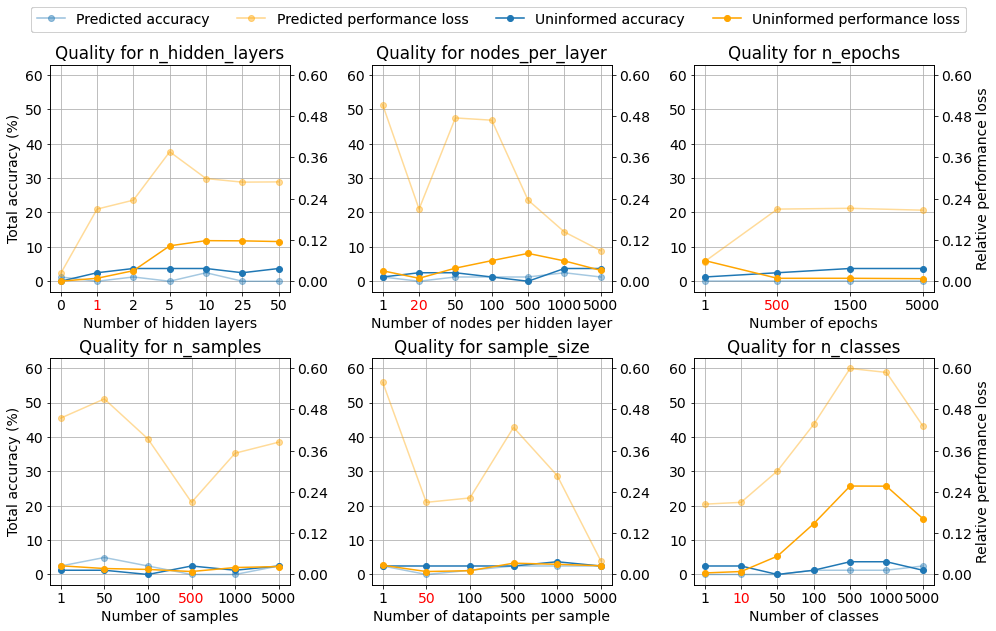

In [88]:
import matplotlib.pyplot as plt
import numpy as np

PARAM_NAME_MAP = {
    "n_hidden_layers" : "Number of hidden layers",
    "nodes_per_layer" : "Number of nodes per hidden layer",
    "n_epochs" : "Number of epochs",
    "n_samples" : "Number of samples",
    "sample_size" : "Number of datapoints per sample",
    "n_classes" : "Number of classes"
}

# Credits: https://stackoverflow.com/questions/37765197/darken-or-lighten-a-color-in-matplotlib
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

podium_size = 1
ax1_limit = [0, 60]
ax2_limit = [0, 0.6]
alpha = 0.4
font_size = 14
margin = 3

# Using the functions above, we will now proceed to plot for all parameters
plt.rcParams.update({'font.size': font_size})
fig, ax = plt.subplots(2, 3, sharey=False, figsize=(14,9))
fig.tight_layout(pad=margin)
prev_ax1 = None
prev_ax2 = None
shared_y1 = None
shared_y2 = None
for i, varname in enumerate(NAMES):
    # Acquire the data
    predicted_data = get_by_var(predicted_rankings, varname)
    benchmark_data = get_by_var(benchmark_rankings, varname)
    xs = [elem[0] for elem in predicted_data]
    ys_pred = [get_quality(predicted_data[i][1], benchmark_data[i][1], podium_size=podium_size) for i in range(len(predicted_data))]
    ys_unin = [get_quality(uninformed_ranking, benchmark_data[i][1], podium_size=podium_size) for i in range(len(predicted_data))]
    
    col = i % 3
    row = i // 3
    
    # Create a secondary axis and share it with the first
    ax1 = ax[row, col]
    ax2 = ax1.twinx()
    
    # Link the axes
    if shared_y1 is None:
        shared_y1 = ax1.get_shared_y_axes()
    else:
        shared_y1.join(prev_ax1, ax1)
    if shared_y2 is None:
        shared_y2 = ax2.get_shared_y_axes()
    else:
        shared_y2.join(prev_ax2, ax2)
    prev_ax1 = ax1
    prev_ax2 = ax2
    
    # Set ax properties
    ax1.set_title(f"Quality for {varname}", loc="center")
    ax1.set_xlabel(PARAM_NAME_MAP[varname])
    ax1.set_xticks(range(len(xs)))
    ax1.set_xticklabels(xs)
    ax1.set_ylim([ax1_limit[0] - (ax1_limit[1] - ax1_limit[0]) * 0.05, ax1_limit[1] + (ax1_limit[1] - ax1_limit[0]) * 0.05])
    ax1.grid()
    if col == 0:
        ax1.set_ylabel("Total accuracy (%)")

    ax2.set_ylim([ax2_limit[0] - (ax2_limit[1] - ax2_limit[0]) * 0.05, ax2_limit[1] + (ax2_limit[1] - ax2_limit[0]) * 0.05])
    ax2.set_yticks(np.linspace(ax2_limit[0], ax2_limit[1], 6))
    if col == 2:
        ax2.set_ylabel("Relative performance loss")
    
    # Change the colour of the default xtick to red
    ax1.get_xticklabels()[xs.index(NAME_DEFAULT_MAP[varname])].set_color('red') 
    
    # Plot the predicted stuff
    ln1 = ax1.plot(range(len(xs)), [y[0] for y in ys_pred], '-o', color='C0', alpha=alpha, label="Predicted accuracy")
    text = f"best {podium_size} ranks" if podium_size > 1 else "best rank"
    ln2 = ax2.plot(range(len(xs)), [y[1]["total"] for y in ys_pred], '-o', color='orange', alpha=alpha, label=f"Predicted performance loss")
    
    # Plot the uninformed stuff
    ln3 = ax1.plot(range(len(xs)), [y[0] for y in ys_unin], '-o', color='C0', label="Uninformed accuracy")
    ln4 = ax2.plot(range(len(xs)), [y[1]["total"] for y in ys_unin], '-o', color='orange', label=f"Uninformed performance loss")
    
    lns = [ln1[0], ln2[0], ln3[0], ln4[0]]
    lbs = [l.get_label() for l in lns]
    
    fig.legend(lns, lbs, loc="upper center", ncol=len(lns))

# Finally, show and save
plt.subplots_adjust(top=0.9)
fig.savefig(f"plots/plot.pdf", bbox_inches='tight')